In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 28

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 28)                308       
                                                                 
Total params: 1,378
Trainable params: 1,378
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
11/13 [========================>.....] - ETA: 0s - loss: 3.3428 - accuracy: 0.0518
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 4s 117ms/step - loss: 3.3406 - accuracy: 0.0524 - val_loss: 3.2930 - val_accuracy: 0.0777
Epoch 2/1000
13/13 [==============================] - ETA: 0s - loss: 3.3102 - accuracy: 0.0593
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 1s 55ms/step - loss: 3.3102 - accuracy: 0.0593 - val_loss: 3.2658 - val_accuracy: 0.0758
Epoch 3/1000
 9/13 [===================>..........] - ETA: 0s - loss: 3.2845 - accuracy: 0.0738
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 32ms/step - loss: 3.2812 - accuracy: 0.0758 - val_loss: 3.2398 - val_accuracy: 0.0833
Epoch 4/1000
11/13 [========================>.....] - ETA: 0s - loss: 3.2450 - accuracy: 0.09

 7/13 [===============>..............] - ETA: 0s - loss: 2.1973 - accuracy: 0.2812
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 19ms/step - loss: 2.1840 - accuracy: 0.2910 - val_loss: 1.9379 - val_accuracy: 0.3977
Epoch 29/1000
 8/13 [=================>............] - ETA: 0s - loss: 2.1715 - accuracy: 0.2832
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 24ms/step - loss: 2.1621 - accuracy: 0.2992 - val_loss: 1.8871 - val_accuracy: 0.4508
Epoch 30/1000
 9/13 [===================>..........] - ETA: 0s - loss: 2.1239 - accuracy: 0.3134
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 19ms/step - loss: 2.1047 - accuracy: 0.3163 - val_loss: 1.8416 - val_accuracy: 0.4470
Epoch 31/1000
12/13 [==========================>...] - ETA: 0s - loss: 2.0894 - accuracy: 0.3112
Epoch

Epoch 55/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.5410 - accuracy: 0.4922
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 12ms/step - loss: 1.6434 - accuracy: 0.4160 - val_loss: 1.2583 - val_accuracy: 0.6402
Epoch 56/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.7613 - accuracy: 0.4688
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 10ms/step - loss: 1.6791 - accuracy: 0.4167 - val_loss: 1.2432 - val_accuracy: 0.6231
Epoch 57/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.4893 - accuracy: 0.4688
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 12ms/step - loss: 1.6315 - accuracy: 0.4381 - val_loss: 1.2224 - val_accuracy: 0.6705
Epoch 58/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.5530 - accuracy

Epoch 82/1000
13/13 [==============================] - ETA: 0s - loss: 1.4890 - accuracy: 0.4754
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 1s 47ms/step - loss: 1.4890 - accuracy: 0.4754 - val_loss: 1.0092 - val_accuracy: 0.7443
Epoch 83/1000
10/13 [======================>.......] - ETA: 0s - loss: 1.4695 - accuracy: 0.4820
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 1s 64ms/step - loss: 1.4854 - accuracy: 0.4792 - val_loss: 1.0059 - val_accuracy: 0.7633
Epoch 84/1000
13/13 [==============================] - ETA: 0s - loss: 1.4931 - accuracy: 0.4729
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 1s 57ms/step - loss: 1.4931 - accuracy: 0.4729 - val_loss: 1.0004 - val_accuracy: 0.7670
Epoch 85/1000
 7/13 [===============>..............] - ETA: 0s - loss: 1.3660 - accuracy

Epoch 109/1000
12/13 [==========================>...] - ETA: 0s - loss: 1.3836 - accuracy: 0.5085
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 17ms/step - loss: 1.3910 - accuracy: 0.5051 - val_loss: 0.8674 - val_accuracy: 0.8201
Epoch 110/1000
12/13 [==========================>...] - ETA: 0s - loss: 1.3724 - accuracy: 0.5208
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 17ms/step - loss: 1.3759 - accuracy: 0.5189 - val_loss: 0.8660 - val_accuracy: 0.8258
Epoch 111/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.3622 - accuracy: 0.5156
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 14ms/step - loss: 1.3504 - accuracy: 0.5354 - val_loss: 0.8589 - val_accuracy: 0.8182
Epoch 112/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.2507 - a

Epoch 136/1000
13/13 [==============================] - ETA: 0s - loss: 1.3077 - accuracy: 0.5423
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 15ms/step - loss: 1.3077 - accuracy: 0.5423 - val_loss: 0.7779 - val_accuracy: 0.8428
Epoch 137/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.4972 - accuracy: 0.4844
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 14ms/step - loss: 1.3061 - accuracy: 0.5297 - val_loss: 0.7733 - val_accuracy: 0.8371
Epoch 138/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.3864 - accuracy: 0.5000
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 12ms/step - loss: 1.2848 - accuracy: 0.5429 - val_loss: 0.7714 - val_accuracy: 0.8295
Epoch 139/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.0411 - a

Epoch 163/1000
12/13 [==========================>...] - ETA: 0s - loss: 1.1821 - accuracy: 0.5866
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 17ms/step - loss: 1.1803 - accuracy: 0.5865 - val_loss: 0.6921 - val_accuracy: 0.8523
Epoch 164/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.2364 - accuracy: 0.6328
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 13ms/step - loss: 1.2259 - accuracy: 0.5676 - val_loss: 0.6821 - val_accuracy: 0.8523
Epoch 165/1000
12/13 [==========================>...] - ETA: 0s - loss: 1.2356 - accuracy: 0.5521
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 15ms/step - loss: 1.2436 - accuracy: 0.5505 - val_loss: 0.6798 - val_accuracy: 0.8636
Epoch 166/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.0997 - a

Epoch 190/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.2644 - accuracy: 0.5547
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 14ms/step - loss: 1.1417 - accuracy: 0.5972 - val_loss: 0.6202 - val_accuracy: 0.8750
Epoch 191/1000
 9/13 [===================>..........] - ETA: 0s - loss: 1.1965 - accuracy: 0.5903
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 20ms/step - loss: 1.2008 - accuracy: 0.5890 - val_loss: 0.6182 - val_accuracy: 0.8731
Epoch 192/1000
11/13 [========================>.....] - ETA: 0s - loss: 1.1626 - accuracy: 0.5902
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 14ms/step - loss: 1.1412 - accuracy: 0.5960 - val_loss: 0.6222 - val_accuracy: 0.8561
Epoch 193/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.1407 - a

Epoch 217/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.1934 - accuracy: 0.5547
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 15ms/step - loss: 1.1389 - accuracy: 0.6016 - val_loss: 0.5897 - val_accuracy: 0.8674
Epoch 218/1000
 9/13 [===================>..........] - ETA: 0s - loss: 1.1477 - accuracy: 0.5929
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 19ms/step - loss: 1.1576 - accuracy: 0.5840 - val_loss: 0.5842 - val_accuracy: 0.8939
Epoch 219/1000
10/13 [======================>.......] - ETA: 0s - loss: 1.1537 - accuracy: 0.5906
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 17ms/step - loss: 1.1424 - accuracy: 0.5947 - val_loss: 0.5830 - val_accuracy: 0.8939
Epoch 220/1000
12/13 [==========================>...] - ETA: 0s - loss: 1.1796 - a

Epoch 244/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.1839 - accuracy: 0.5938
Epoch 244: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 14ms/step - loss: 1.0904 - accuracy: 0.6098 - val_loss: 0.5346 - val_accuracy: 0.8996
Epoch 245/1000
13/13 [==============================] - ETA: 0s - loss: 1.1250 - accuracy: 0.6117
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 13ms/step - loss: 1.1250 - accuracy: 0.6117 - val_loss: 0.5352 - val_accuracy: 0.8996
Epoch 246/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.1026 - accuracy: 0.5469
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 15ms/step - loss: 1.1309 - accuracy: 0.5852 - val_loss: 0.5403 - val_accuracy: 0.8958
Epoch 247/1000
11/13 [========================>.....] - ETA: 0s - loss: 1.0623 - a

Epoch 271/1000
11/13 [========================>.....] - ETA: 0s - loss: 1.1007 - accuracy: 0.6151
Epoch 271: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 26ms/step - loss: 1.0906 - accuracy: 0.6174 - val_loss: 0.5106 - val_accuracy: 0.8977
Epoch 272/1000
12/13 [==========================>...] - ETA: 0s - loss: 1.0527 - accuracy: 0.6270
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 30ms/step - loss: 1.0482 - accuracy: 0.6294 - val_loss: 0.5105 - val_accuracy: 0.9129
Epoch 273/1000
11/13 [========================>.....] - ETA: 0s - loss: 1.0522 - accuracy: 0.6207
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 26ms/step - loss: 1.0496 - accuracy: 0.6218 - val_loss: 0.5095 - val_accuracy: 0.8845
Epoch 274/1000
 7/13 [===============>..............] - ETA: 0s - loss: 1.1081 - a

Epoch 298/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.0580 - accuracy: 0.6094
Epoch 298: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 13ms/step - loss: 1.0762 - accuracy: 0.6275 - val_loss: 0.4809 - val_accuracy: 0.9072
Epoch 299/1000
 9/13 [===================>..........] - ETA: 0s - loss: 1.0576 - accuracy: 0.6215
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 15ms/step - loss: 1.0679 - accuracy: 0.6250 - val_loss: 0.4773 - val_accuracy: 0.9110
Epoch 300/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.8557 - accuracy: 0.6875
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 11ms/step - loss: 1.0375 - accuracy: 0.6414 - val_loss: 0.4730 - val_accuracy: 0.9167
Epoch 301/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.1536 - a

Epoch 325/1000
13/13 [==============================] - ETA: 0s - loss: 1.0476 - accuracy: 0.6313
Epoch 325: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 36ms/step - loss: 1.0476 - accuracy: 0.6313 - val_loss: 0.4489 - val_accuracy: 0.9413
Epoch 326/1000
10/13 [======================>.......] - ETA: 0s - loss: 1.0036 - accuracy: 0.6484
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 1s 44ms/step - loss: 1.0132 - accuracy: 0.6452 - val_loss: 0.4488 - val_accuracy: 0.9508
Epoch 327/1000
10/13 [======================>.......] - ETA: 0s - loss: 1.0701 - accuracy: 0.6281
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 1s 40ms/step - loss: 1.0570 - accuracy: 0.6326 - val_loss: 0.4484 - val_accuracy: 0.9489
Epoch 328/1000
11/13 [========================>.....] - ETA: 0s - loss: 1.0486 - a

Epoch 352/1000
13/13 [==============================] - ETA: 0s - loss: 0.9928 - accuracy: 0.6307
Epoch 352: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 39ms/step - loss: 0.9928 - accuracy: 0.6307 - val_loss: 0.4303 - val_accuracy: 0.9508
Epoch 353/1000
10/13 [======================>.......] - ETA: 0s - loss: 1.0430 - accuracy: 0.6398
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 1s 43ms/step - loss: 1.0223 - accuracy: 0.6534 - val_loss: 0.4261 - val_accuracy: 0.9659
Epoch 354/1000
11/13 [========================>.....] - ETA: 0s - loss: 1.0504 - accuracy: 0.6357
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 1s 42ms/step - loss: 1.0466 - accuracy: 0.6351 - val_loss: 0.4268 - val_accuracy: 0.9527
Epoch 355/1000
11/13 [========================>.....] - ETA: 0s - loss: 1.0062 - a

Epoch 379/1000
 8/13 [=================>............] - ETA: 0s - loss: 1.0017 - accuracy: 0.6484
Epoch 379: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 21ms/step - loss: 1.0131 - accuracy: 0.6471 - val_loss: 0.4167 - val_accuracy: 0.9375
Epoch 380/1000
10/13 [======================>.......] - ETA: 0s - loss: 1.0165 - accuracy: 0.6313
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 18ms/step - loss: 0.9926 - accuracy: 0.6370 - val_loss: 0.4190 - val_accuracy: 0.9564
Epoch 381/1000
 8/13 [=================>............] - ETA: 0s - loss: 1.0231 - accuracy: 0.6377
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 22ms/step - loss: 1.0126 - accuracy: 0.6427 - val_loss: 0.4244 - val_accuracy: 0.9508
Epoch 382/1000
12/13 [==========================>...] - ETA: 0s - loss: 0.9752 - a

Epoch 406/1000
13/13 [==============================] - ETA: 0s - loss: 0.9568 - accuracy: 0.6711
Epoch 406: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 1s 43ms/step - loss: 0.9568 - accuracy: 0.6711 - val_loss: 0.4017 - val_accuracy: 0.9375
Epoch 407/1000
13/13 [==============================] - ETA: 0s - loss: 0.9486 - accuracy: 0.6698
Epoch 407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 39ms/step - loss: 0.9486 - accuracy: 0.6698 - val_loss: 0.3943 - val_accuracy: 0.9545
Epoch 408/1000
12/13 [==========================>...] - ETA: 0s - loss: 0.9610 - accuracy: 0.6654
Epoch 408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 1s 43ms/step - loss: 0.9544 - accuracy: 0.6660 - val_loss: 0.3943 - val_accuracy: 0.9508
Epoch 409/1000
11/13 [========================>.....] - ETA: 0s - loss: 0.9798 - a

Epoch 433/1000
12/13 [==========================>...] - ETA: 0s - loss: 1.0047 - accuracy: 0.6413
Epoch 433: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 16ms/step - loss: 1.0087 - accuracy: 0.6389 - val_loss: 0.3840 - val_accuracy: 0.9545
Epoch 434/1000
11/13 [========================>.....] - ETA: 0s - loss: 0.9474 - accuracy: 0.6712
Epoch 434: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 16ms/step - loss: 0.9543 - accuracy: 0.6673 - val_loss: 0.3806 - val_accuracy: 0.9545
Epoch 435/1000
10/13 [======================>.......] - ETA: 0s - loss: 0.9298 - accuracy: 0.6758
Epoch 435: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 17ms/step - loss: 0.9372 - accuracy: 0.6692 - val_loss: 0.3769 - val_accuracy: 0.9564
Epoch 436/1000
10/13 [======================>.......] - ETA: 0s - loss: 0.9470 - a

Epoch 460/1000
12/13 [==========================>...] - ETA: 0s - loss: 0.9880 - accuracy: 0.6595
Epoch 460: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 1s 49ms/step - loss: 0.9898 - accuracy: 0.6604 - val_loss: 0.3693 - val_accuracy: 0.9640
Epoch 461/1000
10/13 [======================>.......] - ETA: 0s - loss: 0.9551 - accuracy: 0.6742
Epoch 461: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 1s 55ms/step - loss: 0.9627 - accuracy: 0.6698 - val_loss: 0.3643 - val_accuracy: 0.9659
Epoch 462/1000
10/13 [======================>.......] - ETA: 0s - loss: 0.9660 - accuracy: 0.6656
Epoch 462: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 35ms/step - loss: 0.9497 - accuracy: 0.6660 - val_loss: 0.3678 - val_accuracy: 0.9583
Epoch 463/1000
12/13 [==========================>...] - ETA: 0s - loss: 0.9807 - a

Epoch 487/1000
 8/13 [=================>............] - ETA: 0s - loss: 0.9723 - accuracy: 0.6611
Epoch 487: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 20ms/step - loss: 0.9810 - accuracy: 0.6559 - val_loss: 0.3580 - val_accuracy: 0.9621
Epoch 488/1000
13/13 [==============================] - ETA: 0s - loss: 0.9465 - accuracy: 0.6616
Epoch 488: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 26ms/step - loss: 0.9465 - accuracy: 0.6616 - val_loss: 0.3584 - val_accuracy: 0.9583
Epoch 489/1000
 8/13 [=================>............] - ETA: 0s - loss: 0.9627 - accuracy: 0.6582
Epoch 489: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
13/13 [==============================] - 0s 27ms/step - loss: 0.9608 - accuracy: 0.6648 - val_loss: 0.3560 - val_accuracy: 0.9697
Epoch 490/1000
11/13 [========================>.....] - ETA: 0s - loss: 0.9613 - a

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

5/5 [==============================] - 0s 4ms/step - loss: 0.3421 - accuracy: 0.9678


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 241ms/step
[1.0100642e-02 5.1569208e-05 7.1752451e-02 4.5887627e-06 8.2782502e-17
 1.7281643e-09 4.3546642e-18 1.2426271e-16 8.1971800e-01 6.1997217e-13
 3.1023752e-08 1.2500045e-07 1.3602572e-02 9.3207198e-08 3.9206725e-03
 5.6262338e-15 1.6605616e-13 8.8878352e-07 8.9939926e-03 3.4671402e-08
 9.1189261e-12 3.2719387e-16 6.0411494e-18 3.2196764e-05 2.5023963e-10
 7.0232227e-02 3.6727357e-10 1.5899190e-03]
8


# Confusion matrix

17/17 [==============================] - 0s 5ms/step


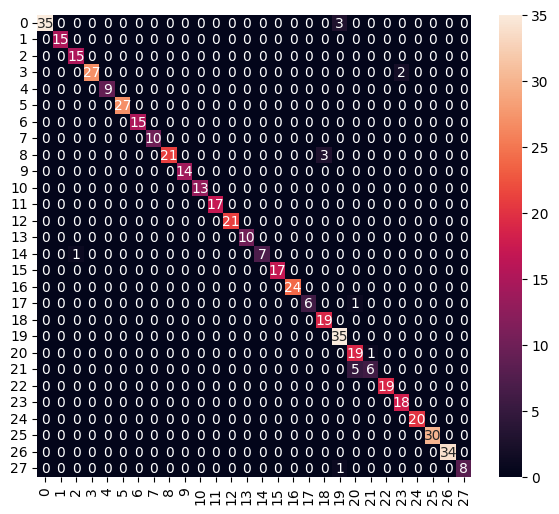

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        38
           1       1.00      1.00      1.00        15
           2       0.94      1.00      0.97        15
           3       1.00      0.93      0.96        29
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        10
           8       1.00      0.88      0.93        24
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        13
          11       1.00      1.00      1.00        17
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        10
          14       1.00      0.88      0.93         8
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        24
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\samar\AppData\Local\Temp\tmped973yux\assets


7544

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.0100638e-02 5.1569208e-05 7.1752504e-02 4.5887718e-06 8.2781867e-17
 1.7281574e-09 4.3546477e-18 1.2426272e-16 8.1971800e-01 6.1997206e-13
 3.1023752e-08 1.2500021e-07 1.3602572e-02 9.3207113e-08 3.9206743e-03
 5.6262342e-15 1.6605552e-13 8.8878346e-07 8.9940019e-03 3.4671334e-08
 9.1189261e-12 3.2719387e-16 6.0411494e-18 3.2196793e-05 2.5023919e-10
 7.0232250e-02 3.6727357e-10 1.5899180e-03]
8
